In [48]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

In [49]:
df = pd.read_csv('data/zameen-main-dataset-all.csv', parse_dates=True)

In [50]:
df['Date Scraped'] = pd.to_datetime(df['Date Scraped'])

In [51]:
df['Date Scraped'].value_counts().reset_index()['index'].sort_values()

0   2020-10-28
5   2020-10-29
3   2020-10-30
6   2020-10-31
2   2020-11-02
7   2020-11-03
1   2020-11-04
4   2020-11-06
Name: index, dtype: datetime64[ns]

In [52]:
df['Date Scraped'].max()

Timestamp('2020-11-06 00:00:00')

In [53]:
# get latest scrape
# ASSUMPTION: all listings scraped before midnight on same day
df = df[df['Date Scraped'] == df['Date Scraped'].max()].copy()

In [54]:
pd.set_option('max_columns', 50)

In [55]:
df.shape

(91780, 35)

In [56]:
df.head(1)

,Property ID,Purpose,Type,Title,Subtitle,Location,Area,Price,Beds,Baths,Year of Construction,Servant Quarters,Parking Spaces,Double Glazed Windows,Central AC,Park,Jacuzzi,Agency,Agent,Titanium Agency?,Agency Video,Number of Images,Tour Video,Property Verified,Date Scraped,URL,Added,Date Last Updated,Locality,City,Area_marlas,Price_rupees,Age,Freshness_days,Prob_Fresh
8,25202643,For Sale,House,2 Kanal Brand New Mazhar Munir Design Bungalow...,"DHA Phase 3, DHA Defence, Lahore, Punjab","DHA Defence, Lahore, Punjab",2 Kanal,16 Crore,5.0,7.0,2020-01-01,2.0,6.0,Yes,Yes,No,No,Syed Brothers PVT LTD (Ph: 2 DHA),Mohammad Asad,Yes,Yes,50,No,No,2020-11-06,https://www.zameen.com/Property/dha_defence_dh...,1 day,2020-11-05,DHA Defence,Lahore,40.0,160000000,0.0,1,0.25


In [57]:
df.isna().sum()

Property ID                  0
Purpose                      0
Type                         0
Title                        0
Subtitle                     0
Location                     0
Area                         0
Price                        0
Beds                      6236
Baths                     8521
Year of Construction     70406
Servant Quarters         72853
Parking Spaces           68637
Double Glazed Windows        0
Central AC                   0
Park                         0
Jacuzzi                      0
Agency                   10906
Agent                    10906
Titanium Agency?             0
Agency Video                 0
Number of Images             0
Tour Video                   0
Property Verified            0
Date Scraped                 0
URL                          0
Added                        0
Date Last Updated            0
Locality                     0
City                         0
Area_marlas                  0
Price_rupees                 0
Age     

# EDA

In [58]:
sns.set()

## Purpose, Type

In [59]:
df['Purpose'].value_counts(normalize=True)

For Sale    0.541621
For Rent    0.458379
Name: Purpose, dtype: float64

In [60]:
# filter to homes for sale only
sale = df[df['Purpose'] == 'For Sale'].copy()

In [61]:
sale.shape

(49710, 35)

### Filter to houses, flats and portions 

In [62]:
sale['Type'].value_counts(normalize=False)

House            34030
Flat             13855
Upper Portion      948
Farm House         394
Lower Portion      352
Penthouse          130
Room                 1
Name: Type, dtype: int64

In [63]:
394+1+130

525

In [64]:
# drop farmhouse, room, penthouse (525 rows)
sale['Type'].value_counts(normalize=True)

House            0.684571
Flat             0.278717
Upper Portion    0.019071
Farm House       0.007926
Lower Portion    0.007081
Penthouse        0.002615
Room             0.000020
Name: Type, dtype: float64

In [65]:
sale = sale[~sale['Type'].isin(['Farm House', 'Room', 'Penthouse'])].copy()

In [66]:
type_order = sale['Type'].value_counts(normalize=True).reset_index()['index'].tolist()

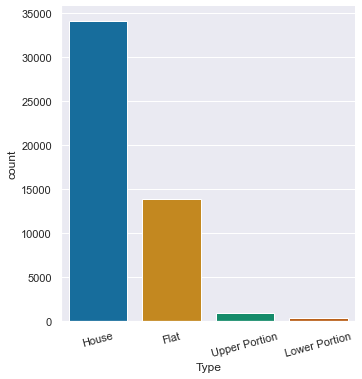

In [67]:
sns.catplot(x='Type', kind='count', data=sale, order=type_order, palette='colorblind')
plt.xticks(rotation=15)
plt.show()

#### Portions for sale

In [68]:
portions = sale[(sale['Purpose'] == 'For Sale') & (sale['Type'].isin(['Upper Portion', 'Lower Portion']))].copy()

In [69]:
portions['City'].value_counts()

Karachi      1276
Lahore         21
Islamabad       3
Name: City, dtype: int64

In [70]:
# drop 1300 rows
sale = sale[~sale.eval("Purpose == 'For Sale' & (Type == 'Upper Portion' or Type == 'Lower Portion')")].copy()

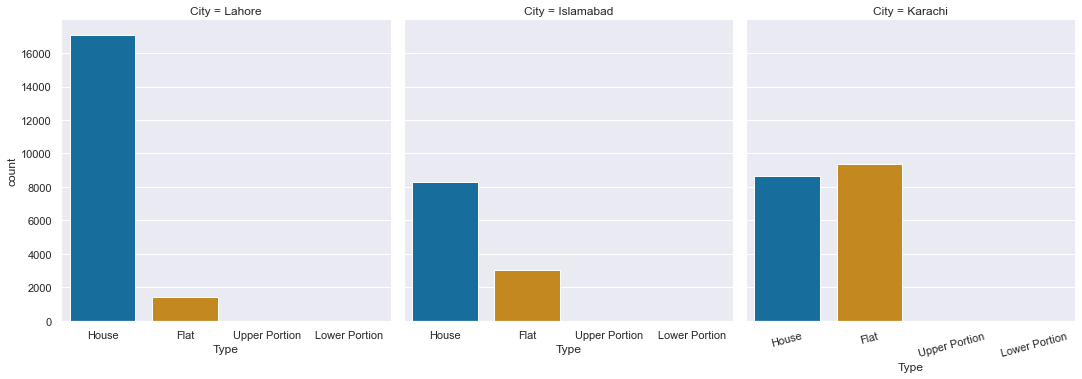

In [71]:
sns.catplot(x='Type', kind='count', data=sale, order=type_order, palette='colorblind', col='City')
plt.xticks(rotation=15)
plt.show()

In [72]:
# flats more common where land is more expensive – Karachi?
# or potentially: people in Lahore have different preferences

## City, Locality

In [73]:
sale['City'].value_counts(normalize=False)

Lahore       18509
Karachi      18041
Islamabad    11335
Name: City, dtype: int64

In [74]:
sale['City'].value_counts(normalize=True)

Lahore       0.386530
Karachi      0.376757
Islamabad    0.236713
Name: City, dtype: float64

In [75]:
city_order = sale['City'].value_counts(normalize=True).reset_index()['index'].tolist()

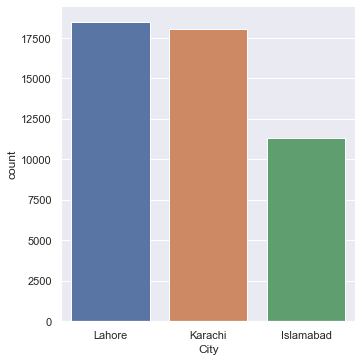

In [76]:
sns.catplot(x='City', kind='count', data=sale, order=city_order)

In [80]:
pd.set_option('display.max_colwidth', 100)

In [81]:
# 1 listing in DHA Phase 6, Lahore
sale[sale['Locality'] == 'DHA City']

,Property ID,Purpose,Type,Title,Subtitle,Location,Area,Price,Beds,Baths,Year of Construction,Servant Quarters,Parking Spaces,Double Glazed Windows,Central AC,Park,Jacuzzi,Agency,Agent,Titanium Agency?,Agency Video,Number of Images,Tour Video,Property Verified,Date Scraped,URL,Added,Date Last Updated,Locality,City,Area_marlas,Price_rupees,Age,Freshness_days,Prob_Fresh
193978,25773296,For Sale,House,1 Kanal Most Beautiful Brand New House For Sale In L Block Phase 6 DHA Lahore Cantt,"DHA City, Lahore, Punjab","DHA City, Lahore, Punjab",1 Kanal,6.6 Crore,5.0,6.0,2020-01-01,2.0,NaN,Yes,Yes,Yes,No,Property Dera,Tayyab Toor,Yes,No,41,No,No,2020-11-06,https://www.zameen.com/Property/lahore_dha_city_1_kanal_most_beautiful_brand_new_house_for_sale_...,1 week,2020-10-30,DHA City,Lahore,20.0,66000000,0.0,7,0.25


In [82]:
# standardize Bahria Town
sale['Locality'] = np.where(sale['Locality'] == 'Bahria Town Karachi', 'Bahria Town', sale['Locality'])

# rename DHA City to DHA Defence for properties in Lahore
sale['Locality'] = np.where(sale['Locality'] == 'DHA City', 'DHA Defence', sale['Locality'])

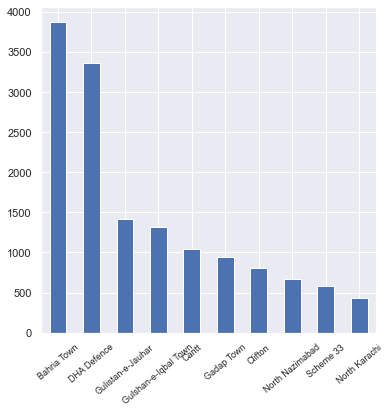

In [83]:
sale[sale['City'] == 'Karachi']['Locality'].value_counts()[:10].plot(kind='bar', grid=True, rot=40, figsize=(6,6))
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()

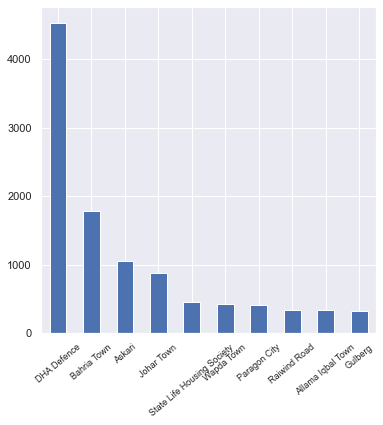

In [84]:
sale[sale['City'] == 'Lahore']['Locality'].value_counts()[:10].plot(kind='bar', grid=True, rot=40, figsize=(6,6))
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()

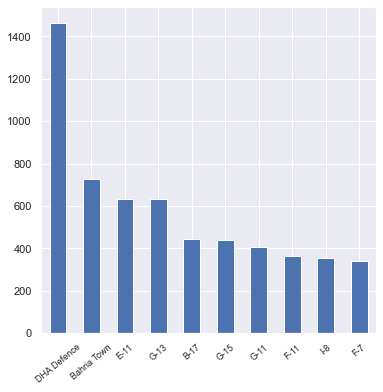

In [85]:
sale[sale['City'] == 'Islamabad']['Locality'].value_counts()[:10].plot(kind='bar', grid=True, rot=40, figsize=(6,6))
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()

<AxesSubplot:>

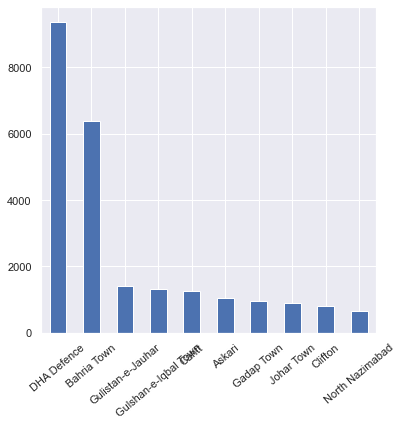

In [86]:
# overall
sale['Locality'].value_counts()[:10].plot(kind='bar', grid=True, rot=40, figsize=(6,6))

## Area

In [87]:
sale['Area_marlas'].astype(int).describe()

count     47885.000000
mean         21.972476
std        2313.948471
min           0.000000
25%           5.000000
50%           8.000000
75%          14.000000
max      506250.000000
Name: Area_marlas, dtype: float64

<AxesSubplot:>

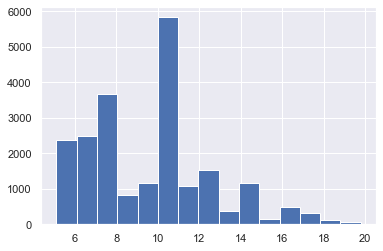

In [91]:
# filter outliers, bins=number of values
# right-skewed
sale[(sale['Area_marlas'] < 20) & (sale['Area_marlas'] > 5)]['Area_marlas'].hist(bins=15)

In [92]:
area = sale[(sale['Area_marlas'] < 20) & (sale['Area_marlas'] > 5)].copy()

In [95]:
area['Type'].value_counts(normalize=True)

House    0.65519
Flat     0.34481
Name: Type, dtype: float64

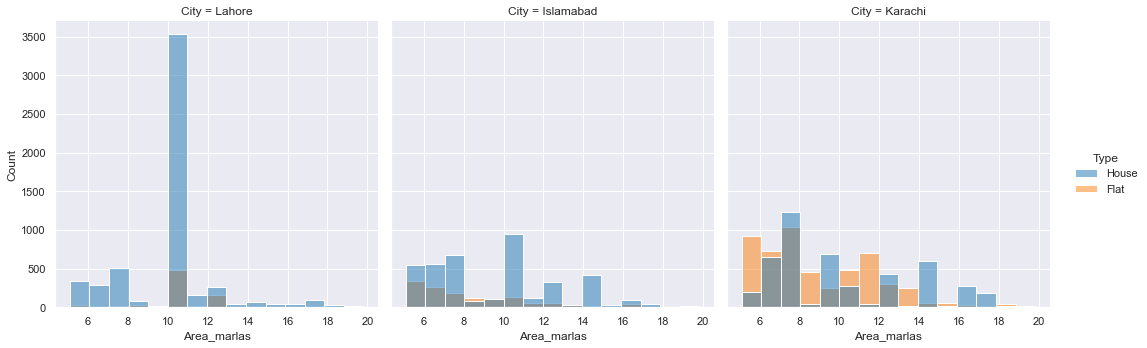

In [98]:
sns.displot(x='Area_marlas', data=area, col='City', bins=15, hue='Type', palette='tab10')

In [99]:
# Karachi area is weighed down by flats?

In [105]:
houses = area[area['Type'] == 'House'].copy()

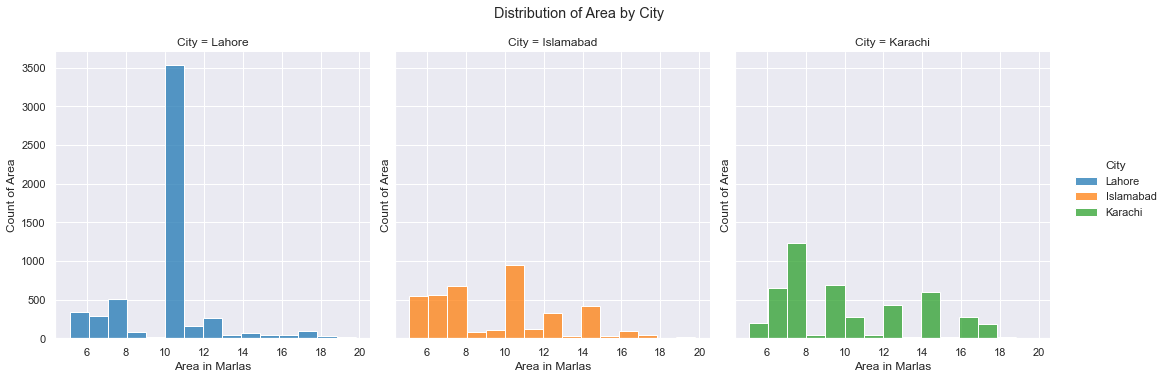

In [106]:
# all three are right-skewed to varying degrees
g = sns.displot(x='Area_marlas', data=houses, col='City', bins=15, hue='City', palette='tab10')
g.fig.subplots_adjust(wspace=0.08)
g.fig.suptitle('Distribution of Area by City', x=0.5, y=1.05)
g.set(xlabel='Area in Marlas', ylabel='Count of Area')
plt.show()

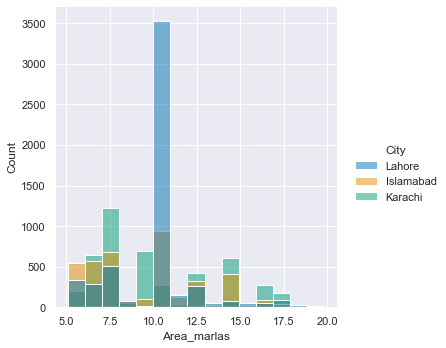

In [107]:
sns.displot(x='Area_marlas', data=houses, hue='City', bins=15, palette='colorblind')

In [108]:
# Lahore has about 75% of 10 marlas on Zameen – bias

## Price

In [112]:
sale[sale['Purpose'] == 'For Sale']['Price_rupees_crores'].describe()

count    47885.000000
mean         3.480180
std          5.375291
min          0.110000
25%          1.000000
50%          1.800000
75%          4.050000
max        250.000000
Name: Price_rupees_crores, dtype: float64

In [113]:
sale.shape

(47885, 38)

In [118]:
(4-1)/30

0.1

In [119]:
# filter to ~middle 50% of values
sale_mid = sale[(sale['Price_rupees_crores'] >  1) & (sale['Price_rupees_crores'] < 4)].copy()

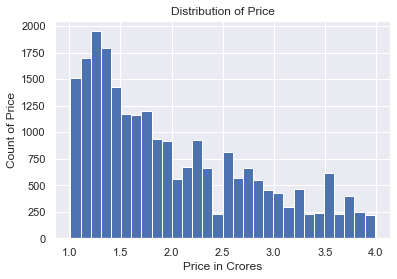

In [120]:
# each bin = 10 lakh
sale_mid['Price_rupees_crores'].hist(bins=30)
plt.xlabel('Price in Crores')
plt.ylabel('Count of Price')
plt.title('Distribution of Price')
plt.show()

<AxesSubplot:>

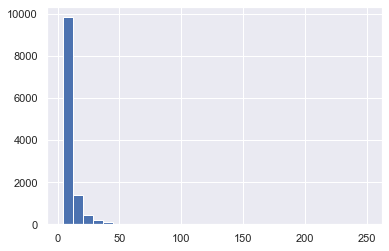

In [124]:
# most values appear to be < 50 crores
# plt.xlim([0,50])
sale[sale['Price_rupees_crores'] > 4]['Price_rupees_crores'].hist(bins=30)

In [125]:
from scipy.stats import skew
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [126]:
# right-skewed
skew(sale_mid['Price_rupees_crores'])

0.7406290236625077

In [127]:
# extremely right-skewed
skew(sale['Price_rupees_crores'])

7.888241188261909

### Filter out price outliers

In [128]:
np.percentile(sale['Price_rupees_crores'], 99.85)

50.0

<AxesSubplot:>

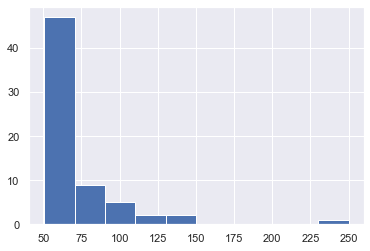

In [129]:
sale[sale['Price_rupees_crores'] > 50]['Price_rupees_crores'].hist()

In [130]:
# removing these
len(sale[sale['Price_rupees_crores'] > 50]['Price_rupees_crores'])

66

In [131]:
# drop 66 rows at 99.85 percentile for Price_rupees_crores
sale = sale[sale['Price_rupees_crores'] <= 50].copy()

In [132]:
# fallen by more than half from 7.9 to 3.9
skew(sale['Price_rupees_crores'])

3.9823861524096227

<AxesSubplot:>

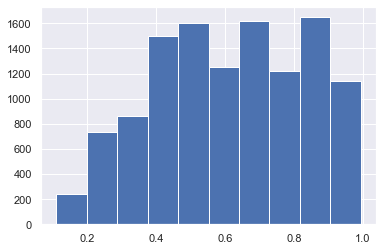

In [133]:
# keeping these
sale[sale['Price_rupees_crores'] < 1]['Price_rupees_crores'].hist()

In [134]:
sale.groupby('City')['Price_rupees_crores'].agg({'mean', 'median'})

,mean,median
City,,
Islamabad,4.160368,1.95
Karachi,3.358918,1.60
Lahore,2.944351,1.90


In [140]:
sale.groupby('City')['Price_rupees_crores'].skew()

City
Islamabad    3.494788
Karachi      3.257618
Lahore       4.264030
Name: Price_rupees_crores, dtype: float64

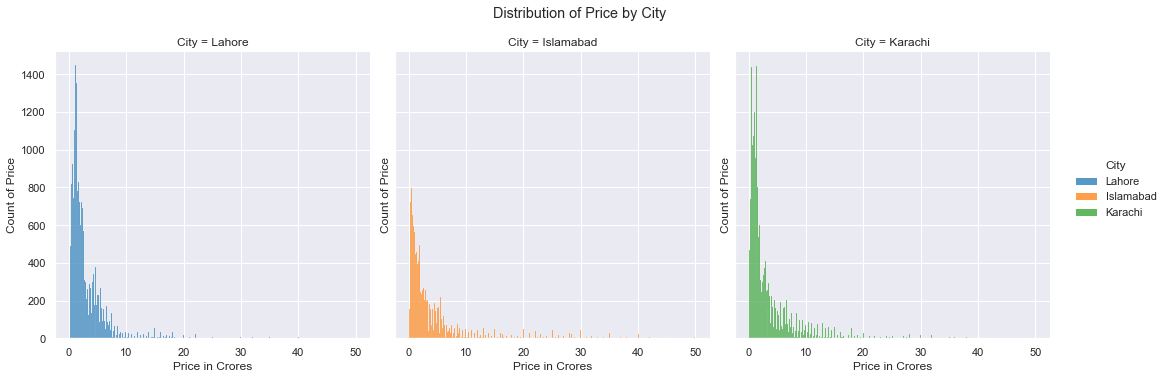

In [163]:
# Islamabad looks different from Lahore and Karachi
g = sns.displot(x='Price_rupees_crores', data=sale, col='City', hue='City', palette='tab10', legend=True)
g.fig.figsize = (12, 12)
g.fig.subplots_adjust(wspace=0.08)
g.fig.suptitle('Distribution of Price by City', x=0.5, y=1.05)
g.set(xlabel='Price in Crores', ylabel='Count of Price')
plt.show()

In [164]:
sale.groupby('Type')['Price_rupees_crores'].skew()

Type
Flat     2.077194
House    3.483010
Name: Price_rupees_crores, dtype: float64

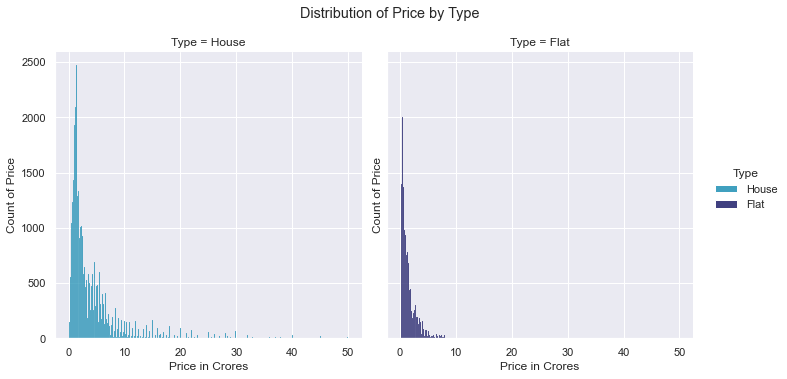

In [165]:
g = sns.displot(x='Price_rupees_crores', data=sale, col='Type', hue='Type', palette='ocean_r', legend=True)
g.fig.subplots_adjust(wspace=0.08)
g.fig.suptitle('Distribution of Price by Type', x=0.5, y=1.05)
g.set(xlabel='Price in Crores', ylabel='Count of Price')
plt.show()

In [166]:
sale['Price_per_marla'].describe()

count    47819.000000
mean        26.982287
std         15.370834
min          0.000395
25%         17.500000
50%         23.387097
75%         32.500000
max        460.000000
Name: Price_per_marla, dtype: float64

In [167]:
np.percentile(sale['Price_per_marla'], 99.9842)

158.89511999994284

In [168]:
len(sale[sale['Price_per_marla'] > 100])

159

In [169]:
# drop 159 rows with ppm > 100 at the 99.98 percentile
sale = sale[sale['Price_per_marla'] <= 100].copy()

<AxesSubplot:>

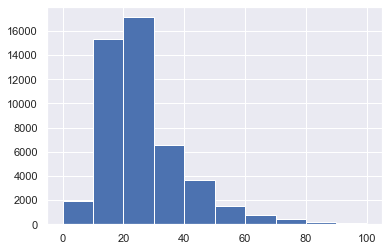

In [170]:
sale['Price_per_marla'].hist()

In [171]:
sale['Price_per_marla'].describe()

count    47660.000000
mean        26.665988
std         14.102827
min          0.000395
25%         17.500000
50%         23.333333
75%         32.250000
max        100.000000
Name: Price_per_marla, dtype: float64

In [181]:
q1 = sale['Price_per_marla'].quantile(q=0.25)
q3 = sale['Price_per_marla'].quantile(q=0.75)

In [182]:
q3-q1

14.75

<AxesSubplot:>

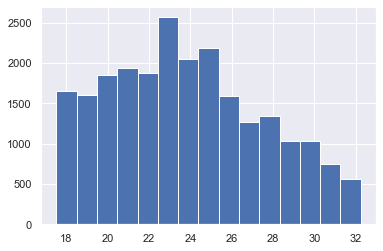

In [183]:
sale[(sale['Price_per_marla'] > q1) & (sale['Price_per_marla'] < q3)]['Price_per_marla'].hist(bins=15)

#### Cheapskates

In [184]:
cheap = sale[sale['Price_per_marla'] <= 20].copy()

<AxesSubplot:>

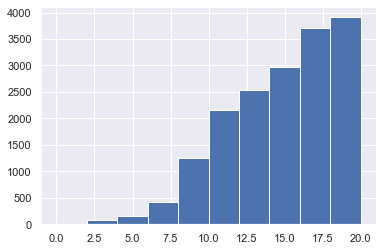

In [185]:
cheap['Price_per_marla'].hist()

In [186]:
pd.set_option('min_rows', 1000)

In [187]:
cheap[cheap['Price_per_marla'] == 15]['Locality'].value_counts()[:5]

Askari                         68
Bahria Town                    59
Gulistan-e-Jauhar              15
Central Park Housing Scheme    14
Ghauri Town                    11
Name: Locality, dtype: int64

<AxesSubplot:>

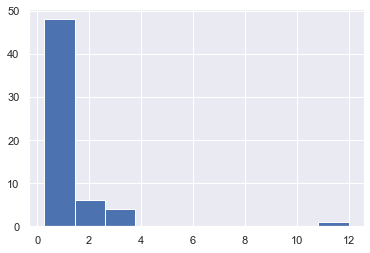

In [188]:
cheap[(cheap['Price_per_marla'] == 15) & (cheap['Locality'] == 'Bahria Town')]['Price_rupees_crores'].hist()

### Price per marla

In [189]:
sale['Price_per_marla'].describe()

count    47660.000000
mean        26.665988
std         14.102827
min          0.000395
25%         17.500000
50%         23.333333
75%         32.250000
max        100.000000
Name: Price_per_marla, dtype: float64

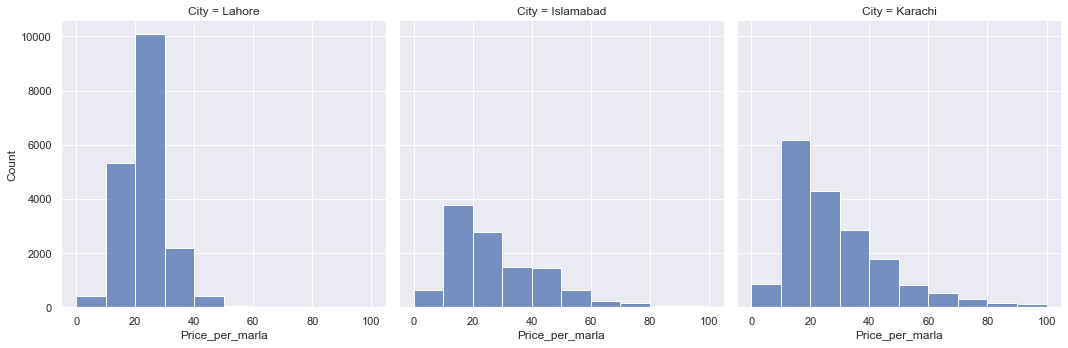

In [190]:
# Lahore looks fine if bins are reduced
sns.displot(x='Price_per_marla', data=sale, col='City', bins=10)

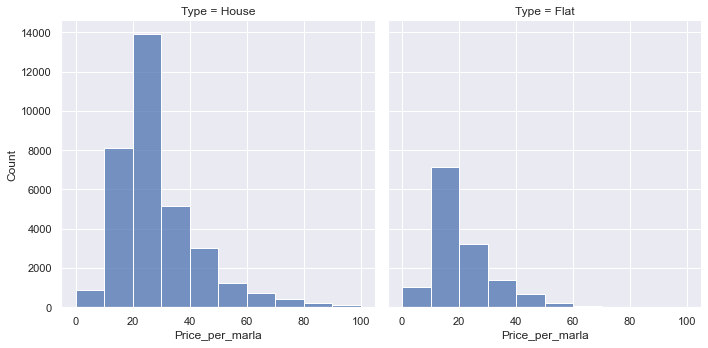

In [191]:
sns.displot(x='Price_per_marla', data=sale, col='Type', bins=10)

### Top Localities

In [192]:
from sklearn.utils import resample

In [193]:
# find top localities for each city
# sample 1000 properties from each localtiy
# displot for each locality by city

In [194]:
top_loc = sale.groupby(['City', 'Locality'])['Property ID'].count().reset_index().sort_values(by=['City', 'Property ID'],
                                                                                            ascending=[True, False])

In [195]:
top_loc.rename(columns={'Property ID': 'Number of Properties'}, inplace=True)

In [196]:
top_loc = top_loc.groupby('City').head(5)

In [197]:
top_loc['Name'] = top_loc['Locality'] +' - '+ top_loc['City']

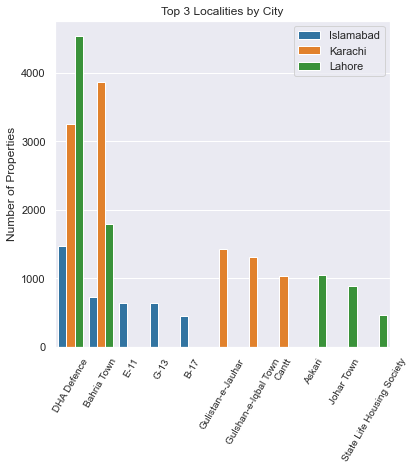

In [198]:
plt.figure(figsize=(6,6))
sns.barplot(x='Locality', y='Number of Properties', data=top_loc, hue='City', palette='tab10')
plt.legend(loc='upper right')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=60)
plt.xlabel('')
plt.title('Top 3 Localities by City')
plt.show()

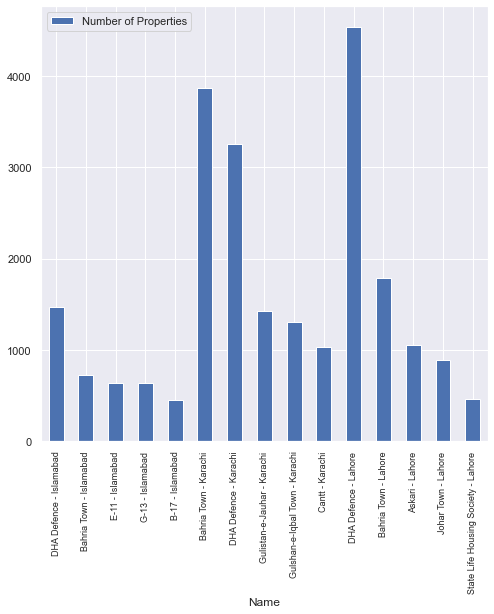

In [199]:
top_loc.plot(kind='bar', x='Name', figsize=(8,8), legend=True)
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()

In [200]:
n_cols = len(sale.columns)
cols = sale.columns

samples = pd.DataFrame(np.array([np.zeros(n_cols)]), columns=cols)

In [201]:
for idx, row in top_loc.iterrows():
    pop = sale[(sale['City'] == row['City']) & (sale['Locality'] == row['Locality'])].copy()
    sample = resample(pop, n_samples=1000)
    
    samples = samples.append(sample)

In [202]:
# drop first row
samples = samples.drop(0)

In [203]:
samples.shape

(15000, 38)

In [204]:
samples.reset_index(drop=True, inplace=True)

In [205]:
samples['Area_marlas'].describe()

count    15000.000000
mean        10.584793
std          7.997510
min          0.600000
25%          5.000000
50%          9.600000
75%         12.000000
max        200.000000
Name: Area_marlas, dtype: float64

In [206]:
# drop 45 rows with bad data in area and price
samples = samples[samples['Area_marlas'] < 100].copy()

# drop 45 rows with bad data in area and price
sale = sale[~((sale['Area_marlas'] > 100) & (sale['Price_rupees_crores'] < 1))].copy()

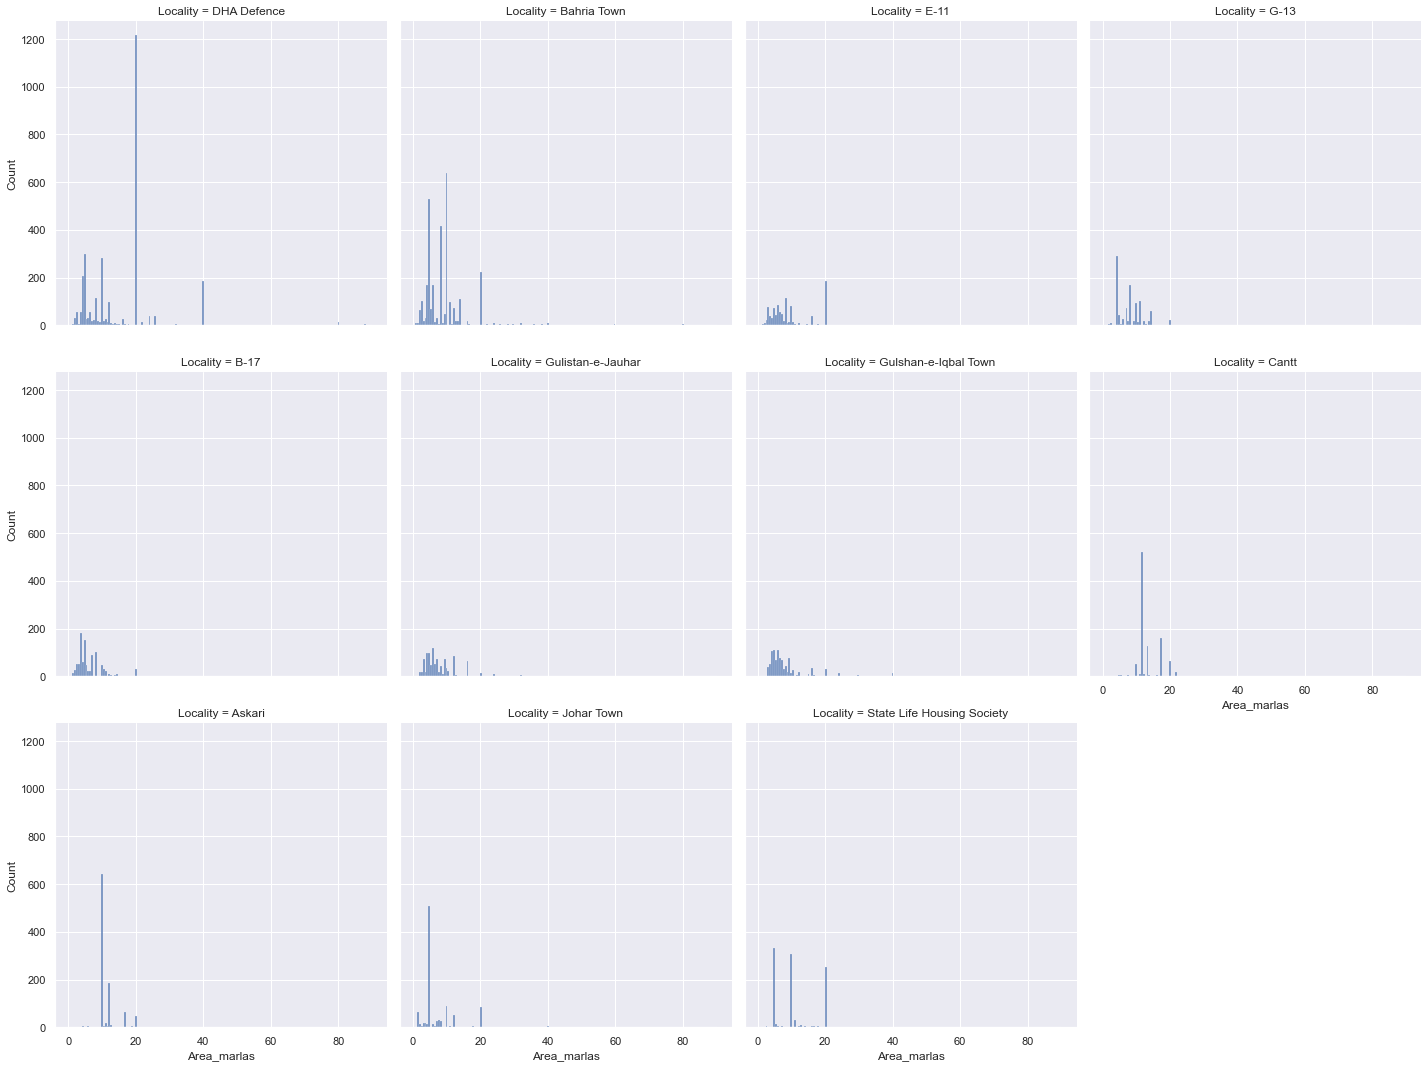

In [207]:
sns.displot(x='Area_marlas', data=samples, col='Locality', col_wrap=4)

## Freshness

In [208]:
sale['Freshness_int'] = sale['Freshness_days'].astype(int)

In [209]:
sale['Freshness_category'] = pd.cut(sale['Freshness_int'], bins=[0,7,14,30,60,90,180,10000], include_lowest=True,
                                  labels=['1 week', '2 weeks', '1 month', '2 months', '3 months', 
                                          '6 months', '1 year or more'])

In [210]:
freshness_order = sale['Freshness_category'].value_counts(normalize=True).reset_index()['index'].tolist()

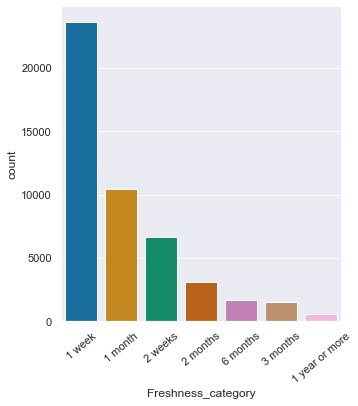

In [211]:
sns.catplot(x='Freshness_category', kind='count', data=sale, order=freshness_order, palette='colorblind')
plt.xticks(rotation=40)
plt.tick_params(axis='x', which='major', labelsize=11)
plt.show()

### Relationships with price

In [212]:
sale['Freshness_days'].describe()

count    47659.000000
mean        24.250740
std         44.209584
min          0.000000
25%          3.000000
50%         14.000000
75%         28.000000
max       1826.000000
Name: Freshness_days, dtype: float64

In [213]:
fresh_sale = sale[sale['Freshness_days'] <= 30].copy()

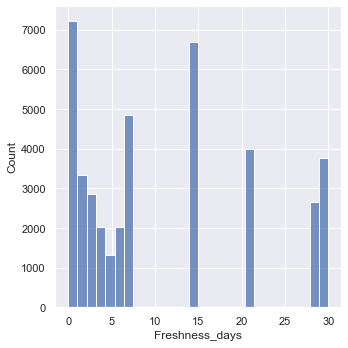

In [214]:
sns.displot(x='Freshness_days', data=fresh_sale)

<AxesSubplot:xlabel='Freshness_days', ylabel='Price_rupees_crores'>

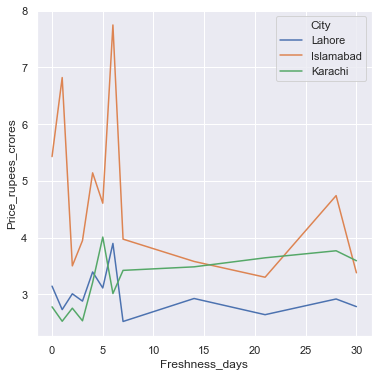

In [215]:
plt.figure(figsize=(6,6))
sns.lineplot(x='Freshness_days', y='Price_rupees_crores', data=fresh_sale, hue='City', ci=None)

In [216]:
ten_marlas = fresh_sale[fresh_sale['Area_marlas'].isin([5,10,20,40])].copy()

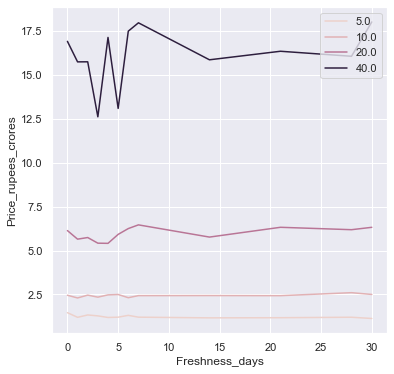

In [217]:
plt.figure(figsize=(6,6))
sns.lineplot(x='Freshness_days', y='Price_rupees_crores', data=ten_marlas, hue='Area_marlas',
             ci=None)
plt.legend(loc='upper right')

In [218]:
prob_fresh = sale[sale['Area_marlas'].isin([5,10,20,40])].copy()

In [219]:
prob_fresh['Prob_Fresh'] = prob_fresh['Prob_Fresh'].round(1)

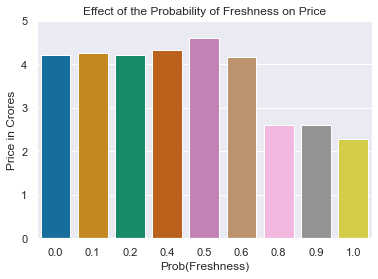

In [220]:
sns.barplot(x='Prob_Fresh', y='Price_rupees_crores', data=prob_fresh, ci=None, palette='colorblind')
plt.ylim([0,5])
plt.ylabel('Price in Crores')
plt.xlabel('Prob(Freshness)')
plt.title('Effect of the Probability of Freshness on Price')
plt.show()

### Age

In [221]:
sale['Age_group'] = pd.cut(sale['Age'], bins=[-1,0,1,5,100], labels=['New', 'Less than 1 years old', 
                                                                           '1-5 years old', '5+ years old'])

In [222]:
sale['Age_group'].value_counts(normalize=True)

New                      0.538287
1-5 years old            0.169057
Less than 1 years old    0.153068
5+ years old             0.139588
Name: Age_group, dtype: float64

In [223]:
sale = pd.concat([sale, pd.get_dummies(sale['Age_group'])], axis=1)

In [224]:
sale['Age'].describe()

count    12761.000000
mean         2.625656
std          5.815035
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        101.000000
Name: Age, dtype: float64

In [225]:
sale.shape

(47659, 45)

In [226]:
12761/len(sale)

0.26775635242031937

<AxesSubplot:>

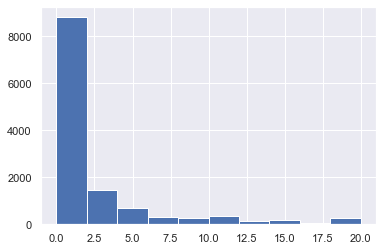

In [227]:
sale[sale['Age'] <= 20]['Age'].hist()

In [228]:
sale_aged = sale[sale['Age'] <= 20].copy()

In [229]:
sale_aged.shape

(12524, 45)

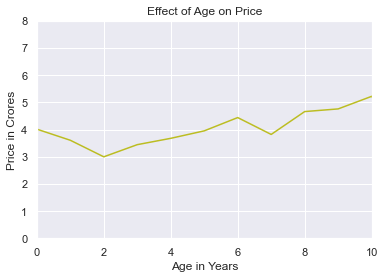

In [230]:
sns.lineplot(x='Age', y='Price_rupees_crores', data=sale_aged, ci=None, color='tab:olive')
plt.xlim([0,10])
plt.ylim([0,8])
plt.title('Effect of Age on Price')
plt.ylabel('Price in Crores')
plt.xlabel('Age in Years')
plt.show()

In [231]:
sale_aged_m = sale_aged[sale_aged['Area_marlas'].isin([5,10,20,40])].copy()

In [232]:
sale_aged_m.shape

(6982, 45)

In [233]:
delta_aged_m = sale_aged_m.groupby(['Area_marlas', 'Age_group'])['Property ID', 'Price_rupees_crores'].agg({'Property ID':'count', 'Price_rupees_crores':'median'}).reset_index()



/Users/abdur_rehman/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [234]:
delta_aged_m.rename(columns={'Property ID': 'Number of Properties'}, inplace=True)

In [235]:
delta_5m_pct = delta_aged_m[delta_aged_m['Area_marlas'] == 5]['Price_rupees_crores'].pct_change()
delta_10m_pct = delta_aged_m[delta_aged_m['Area_marlas'] == 10]['Price_rupees_crores'].pct_change()
delta_20m_pct = delta_aged_m[delta_aged_m['Area_marlas'] == 20]['Price_rupees_crores'].pct_change()
delta_40m_pct = delta_aged_m[delta_aged_m['Area_marlas'] == 40]['Price_rupees_crores'].pct_change()

In [236]:
delta_aged_m['pct_delta'] = pd.concat([delta_5m_pct,delta_10m_pct,delta_20m_pct,delta_40m_pct])

In [237]:
delta_aged_m.iloc[0,3]

1.3

In [238]:
delta_aged_m

,Area_marlas,Age_group,Number of Properties,Price_rupees_crores,pct_delta
0,5.0,New,1026,1.300,NaN
1,5.0,Less than 1 years old,189,1.200,-0.076923
2,5.0,1-5 years old,228,1.120,-0.066667
3,5.0,5+ years old,90,1.250,0.116071
4,10.0,New,1180,2.450,NaN
5,10.0,Less than 1 years old,239,2.100,-0.142857
6,10.0,1-5 years old,307,2.000,-0.047619
7,10.0,5+ years old,171,2.310,0.155000
8,20.0,New,2113,5.350,NaN
9,20.0,Less than 1 years old,362,5.025,-0.060748


In [239]:
deltas_5m = (delta_aged_m.iloc[0,3] - delta_aged_m[delta_aged_m['Area_marlas'] == 5]['Price_rupees_crores'])/delta_aged_m.iloc[0,3]*-1



In [240]:
deltas_10m = (delta_aged_m.iloc[4,3] - delta_aged_m[delta_aged_m['Area_marlas'] == 10]['Price_rupees_crores'])/delta_aged_m.iloc[4,3]*-1



In [241]:
deltas_20m = (delta_aged_m.iloc[8,3] - delta_aged_m[delta_aged_m['Area_marlas'] == 20]['Price_rupees_crores'])/delta_aged_m.iloc[8,3]*-1



In [242]:
deltas_40m = (delta_aged_m.iloc[12,3] - delta_aged_m[delta_aged_m['Area_marlas'] == 40]['Price_rupees_crores'])/delta_aged_m.iloc[12,3]*-1



In [243]:
deltas_from_zero = pd.concat([deltas_5m, deltas_10m, deltas_20m, deltas_40m])

In [244]:
delta_aged_m['pct_delta_0'] = deltas_from_zero

In [245]:
delta_aged_m

,Area_marlas,Age_group,Number of Properties,Price_rupees_crores,pct_delta,pct_delta_0
0,5.0,New,1026,1.300,NaN,-0.000000
1,5.0,Less than 1 years old,189,1.200,-0.076923,-0.076923
2,5.0,1-5 years old,228,1.120,-0.066667,-0.138462
3,5.0,5+ years old,90,1.250,0.116071,-0.038462
4,10.0,New,1180,2.450,NaN,-0.000000
5,10.0,Less than 1 years old,239,2.100,-0.142857,-0.142857
6,10.0,1-5 years old,307,2.000,-0.047619,-0.183673
7,10.0,5+ years old,171,2.310,0.155000,-0.057143
8,20.0,New,2113,5.350,NaN,-0.000000
9,20.0,Less than 1 years old,362,5.025,-0.060748,-0.060748


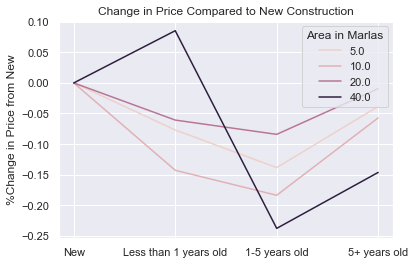

In [246]:
sns.lineplot(x='Age_group', y='pct_delta_0', data=delta_aged_m, hue='Area_marlas')
plt.ylabel('%Change in Price from New')
plt.xlabel('')
plt.title('Change in Price Compared to New Construction')
plt.legend(title='Area in Marlas', loc='upper right')
plt.show()

In [247]:
delta_aged_m['pct_delta'].describe()

count    12.000000
mean     -0.013281
std       0.131334
min      -0.297753
25%      -0.069231
50%      -0.036247
75%       0.093042
max       0.155000
Name: pct_delta, dtype: float64

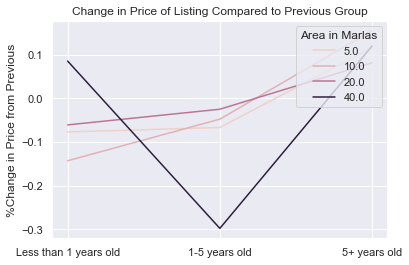

In [248]:
sns.lineplot(x='Age_group', y='pct_delta', data=delta_aged_m, hue='Area_marlas')
plt.ylabel('%Change in Price from Previous')
plt.xlabel('')
plt.title('Change in Price of Listing Compared to Previous Group')
plt.legend(title='Area in Marlas', loc='upper right')
plt.show()

### Beds, Baths

In [249]:
sale['Baths'].describe()

count    43445.000000
mean         4.215836
std          1.827265
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         15.000000
Name: Baths, dtype: float64

In [250]:
sale['Beds'].describe()

count    44751.000000
mean         3.918415
std          1.616432
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         15.000000
Name: Beds, dtype: float64

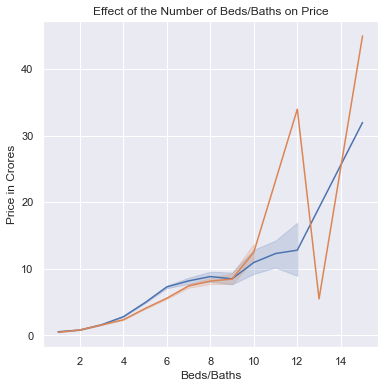

In [251]:
plt.figure(figsize=(6,6))
sns.lineplot(x='Beds', y='Price_rupees_crores', data=sale)
sns.lineplot(x='Baths', y='Price_rupees_crores', data=sale)
# plt.ylim([0,4])
# plt.xlim([0,12])
plt.xlabel('Beds/Baths')
plt.ylabel('Price in Crores')
plt.title('Effect of the Number of Beds/Baths on Price')
plt.show()

### Amenities

In [252]:
sale.columns

Index(['Property ID', 'Purpose', 'Type', 'Title', 'Subtitle', 'Location',
       'Area', 'Price', 'Beds', 'Baths', 'Year of Construction',
       'Servant Quarters', 'Parking Spaces', 'Double Glazed Windows',
       'Central AC', 'Park', 'Jacuzzi', 'Agency', 'Agent', 'Titanium Agency?',
       'Agency Video', 'Number of Images', 'Tour Video', 'Property Verified',
       'Date Scraped', 'URL', 'Added', 'Date Last Updated', 'Locality', 'City',
       'Area_marlas', 'Price_rupees', 'Age', 'Freshness_days', 'Prob_Fresh',
       'Price_rupees_crores', 'Price_rupees_lakhs', 'Price_per_marla',
       'Freshness_int', 'Freshness_category', 'Age_group', 'New',
       'Less than 1 years old', '1-5 years old', '5+ years old'],
      dtype='object')

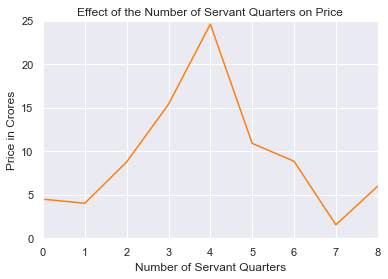

In [253]:
# sns.lineplot(x='Servant Quarters', y='Price_per_marla', data=sale, color='tab:blue')
# ax2 = plt.twinx()
sns.lineplot(x='Servant Quarters', y='Price_rupees_crores', data=sale, color='tab:orange', ci=None)
plt.ylim([0,25])
plt.xlim([0,8])
plt.ylabel('Price in Crores')
plt.xlabel('Number of Servant Quarters')
plt.title('Effect of the Number of Servant Quarters on Price')
plt.show()

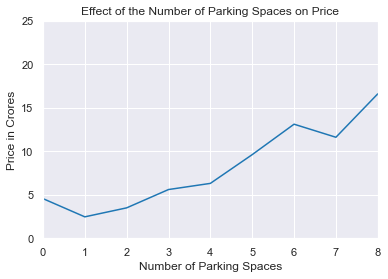

In [254]:
# sns.lineplot(x='Parking Spaces', y='Price_per_marla', data=sale, color='tab:blue')
# ax2 = plt.twinx()
sns.lineplot(x='Parking Spaces', y='Price_rupees_crores', data=sale, color='tab:blue', ci=None)
plt.ylim([0,25])
plt.xlim([0,8])
plt.ylabel('Price in Crores')
plt.xlabel('Number of Parking Spaces')
plt.title('Effect of the Number of Parking Spaces on Price')
plt.show()

In [255]:
sale['Number of Images'].describe()

count    47659.000000
mean        14.174553
std         13.746682
min          0.000000
25%          2.000000
50%         11.000000
75%         22.000000
max        100.000000
Name: Number of Images, dtype: float64

<AxesSubplot:>

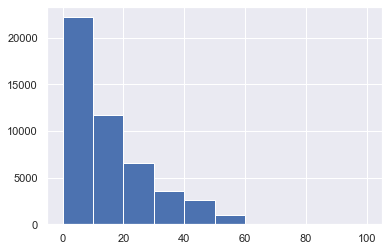

In [256]:
sale['Number of Images'].hist()

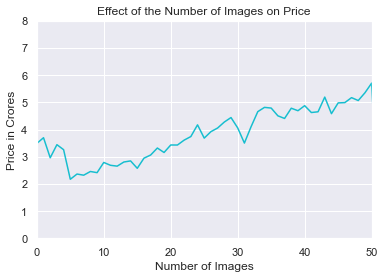

In [257]:
# TODO: split it?
plt.xlim([0,50])
plt.ylim([0,8])
sns.lineplot(x='Number of Images', y='Price_rupees_crores', data=sale, ci=None, color='tab:cyan')
plt.title('Effect of the Number of Images on Price')
plt.ylabel('Price in Crores')
plt.show()

<AxesSubplot:xlabel='Double Glazed Windows', ylabel='Price_rupees_crores'>

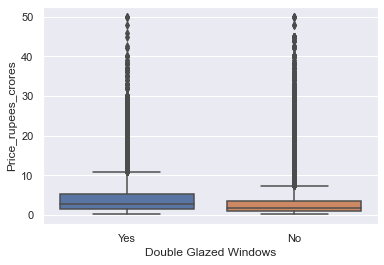

In [258]:
sns.boxplot(x='Double Glazed Windows', y='Price_rupees_crores', data=sale)

<AxesSubplot:xlabel='Central AC', ylabel='Price_rupees_crores'>

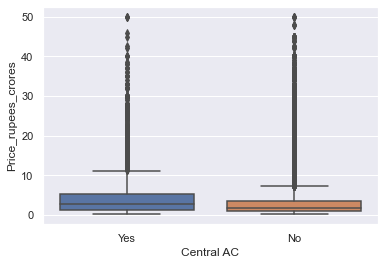

In [259]:
sns.boxplot(x='Central AC', y='Price_rupees_crores', data=sale)

<AxesSubplot:xlabel='Park', ylabel='Price_rupees_crores'>

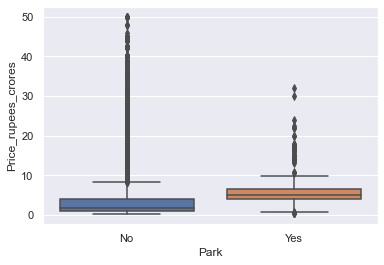

In [260]:
sns.boxplot(x='Park', y='Price_rupees_crores', data=sale)

<AxesSubplot:xlabel='Jacuzzi', ylabel='Price_rupees_crores'>

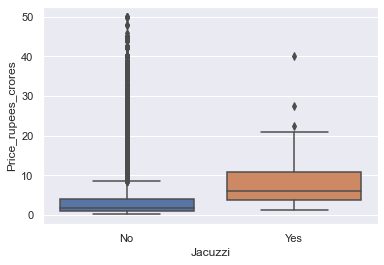

In [261]:
sns.boxplot(x='Jacuzzi', y='Price_rupees_crores', data=sale)

<AxesSubplot:xlabel='Titanium Agency?', ylabel='Price_rupees_crores'>

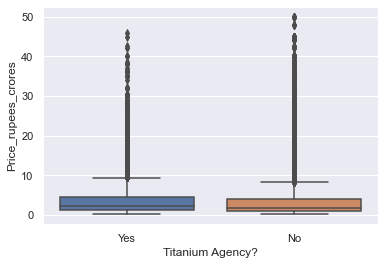

In [262]:
sns.boxplot(x='Titanium Agency?', y='Price_rupees_crores', data=sale)

### Export

In [264]:
sale.reset_index(drop=True, inplace=True)